In [1]:
import pandas as pd

#Read in crimes dataset and explore
df_crimes = pd.read_csv('co_county_crimes.csv')

#remove county from the values in the county column - This is so we can join the two datasets on County column
df_crimes['County'] = df_crimes['County'].str.replace(' County', '')

# Limit to 2021 so that we can view data by month during that year
df_crimes['Year'] = "2021"

# Define a dictionary to replace month names with numerical values
month_numerical = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

#replace the month names with their numerical values in the Month column so it matches the covid dataset
df_crimes['Month'] = df_crimes['Month'].replace(month_numerical)

#drop the Drug Equipment Violations Column, not interested in it. Also drop year, now that its filtered on 2021
df_crimes = df_crimes.drop(columns=['Drug Equipment Violations'])
df_crimes = df_crimes.drop(columns=['Year'])

#Remove Comma from Crime columns so that it can be converted to an integer
df_crimes['Crimes Against Person'] = df_crimes['Crimes Against Person'].str.replace(',', '')
df_crimes['Crimes Against Property'] = df_crimes['Crimes Against Property'].str.replace(',', '')

#Remove NAN Values altogether from crimes columns so that they can be averaged (Used ChatGPT, was unsure how to do this)
df_crimes.dropna(subset=['Crimes Against Person', 'Crimes Against Property', 'Drug/Narcotic Violations'], inplace=True)

#Convert crime columns to integers so we can take an averge per county/month
df_crimes['Crimes Against Person'] = df_crimes['Crimes Against Person'].astype(int)
df_crimes['Crimes Against Property'] = df_crimes['Crimes Against Property'].astype(int)
df_crimes['Drug/Narcotic Violations'] = df_crimes['Drug/Narcotic Violations'].astype(int)

#Now that crime columns have removed nulls, commas, and been converted to integers: find average grouped by County and Month
crime_averages = df_crimes.groupby(['County', 'Month']).agg({'Crimes Against Person':'mean', 'Crimes Against Property':'mean', 'Drug/Narcotic Violations':'mean'}).reset_index()
crime_averages = crime_averages.rename(columns={'Crimes Against Person':'Avg_Crimes Against Person', 'Crimes Against Property':'Avg_Crimes Against Property', 'Drug/Narcotic Violations':'Avg_Drug/Narcotic Violations'})

crime_averages





,County,Month,Avg_Crimes Against Person,Avg_Crimes Against Property,Avg_Drug/Narcotic Violations
0,Adams,1,892.000000,3567.214286,303.142857
1,Adams,2,773.857143,2995.571429,291.428571
2,Adams,3,885.142857,3339.285714,316.357143
3,Adams,4,906.500000,3277.000000,302.500000
4,Adams,5,965.428571,3464.000000,288.142857
...,...,...,...,...,...
675,Yuma,8,6.000000,13.000000,1.500000
676,Yuma,9,4.000000,9.000000,1.000000
677,Yuma,10,3.250000,8.250000,1.500000
678,Yuma,11,1.666667,7.666667,2.000000


In [2]:
#Read in covid dataset and explore
df_covid = pd.read_csv('co_county_covid.csv')

#Remove date column as the month and year are already stored in seperate columns and we dont care the individual day of month
df_covid = df_covid.drop(columns=['Date'])

#Pick one year that has good data during th pandemic to study
df_covid['Year'] = 2021

#Grouping by County and Month and calculating the average cases and deaths per month
covid_cases_grouped = df_covid.groupby(['County', 'Month']).agg({'Cases':'mean', 'Deaths':'mean'}).reset_index()

#renaming the columns to indicate they represent average values
covid_cases_grouped = covid_cases_grouped.rename(columns={'Cases': 'Avg_Covid_Cases', 'Deaths': 'Avg_Covid_Deaths'})


covid_cases_grouped

,County,Month,Avg_Covid_Cases,Avg_Covid_Deaths
0,Adams,1,551.729167,2.604167
1,Adams,2,101.892857,0.678571
2,Adams,3,50.451613,0.241935
3,Adams,4,105.366667,2.016667
4,Adams,5,85.903226,1.516129
...,...,...,...,...
775,Yuma,8,0.483871,0.016129
776,Yuma,9,2.233333,0.016667
777,Yuma,10,4.435484,0.000000
778,Yuma,11,3.683333,0.016667


In [4]:
# Joining covid_cases_grouped and crime_averages on the County and Month columns
crime_covid_join_df = pd.merge(covid_cases_grouped, crime_averages, on=['County','Month'])

# Displaying the new Dataframe
crime_covid_join_df




,County,Month,Avg_Covid_Cases,Avg_Covid_Deaths,Avg_Crimes Against Person,Avg_Crimes Against Property,Avg_Drug/Narcotic Violations
0,Adams,1,551.729167,2.604167,892.000000,3567.214286,303.142857
1,Adams,2,101.892857,0.678571,773.857143,2995.571429,291.428571
2,Adams,3,50.451613,0.241935,885.142857,3339.285714,316.357143
3,Adams,4,105.366667,2.016667,906.500000,3277.000000,302.500000
4,Adams,5,85.903226,1.516129,965.428571,3464.000000,288.142857
...,...,...,...,...,...,...,...
663,Yuma,8,0.483871,0.016129,6.000000,13.000000,1.500000
664,Yuma,9,2.233333,0.016667,4.000000,9.000000,1.000000
665,Yuma,10,4.435484,0.000000,3.250000,8.250000,1.500000
666,Yuma,11,3.683333,0.016667,1.666667,7.666667,2.000000


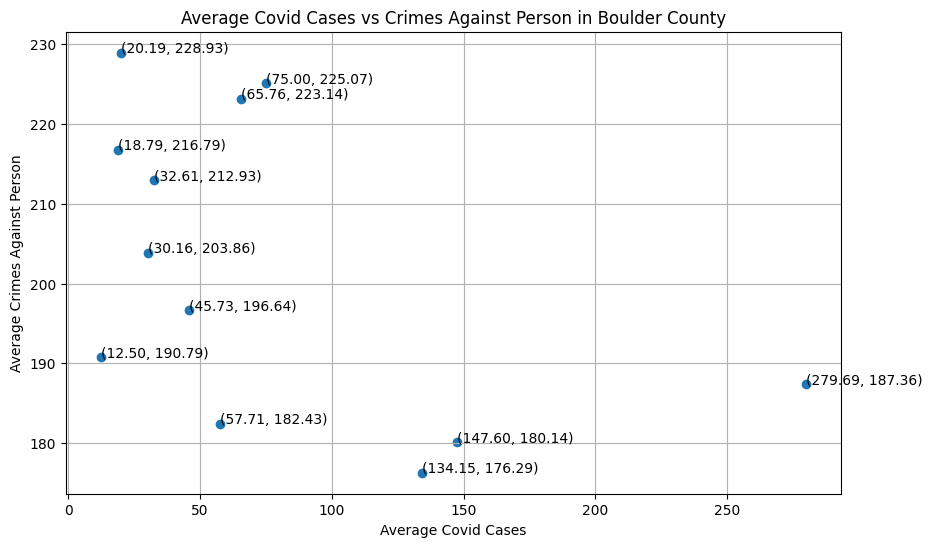

In [44]:
#Create a visualization to see crimes against people compared to covid in Boulder County

import matplotlib.pyplot as plt

#filter the Dataframe for Boulder county
boulder_df = crime_covid_join_df[crime_covid_join_df['County'] == 'Boulder']

#create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(boulder_df['Avg_Covid_Cases'], boulder_df['Avg_Crimes Against Person'])

#annotate each point with its coordinates rounded to two decimals
for index, row in boulder_df.iterrows():
    plt.text(row["Avg_Covid_Cases"], row["Avg_Crimes Against Person"], f'({row["Avg_Covid_Cases"]:.2f}, {row["Avg_Crimes Against Person"]:.2f})')

plt.title('Average Covid Cases vs Crimes Against Person in Boulder County')
plt.xlabel('Average Covid Cases')
plt.ylabel('Average Crimes Against Person')
plt.grid(True)
plt.show()




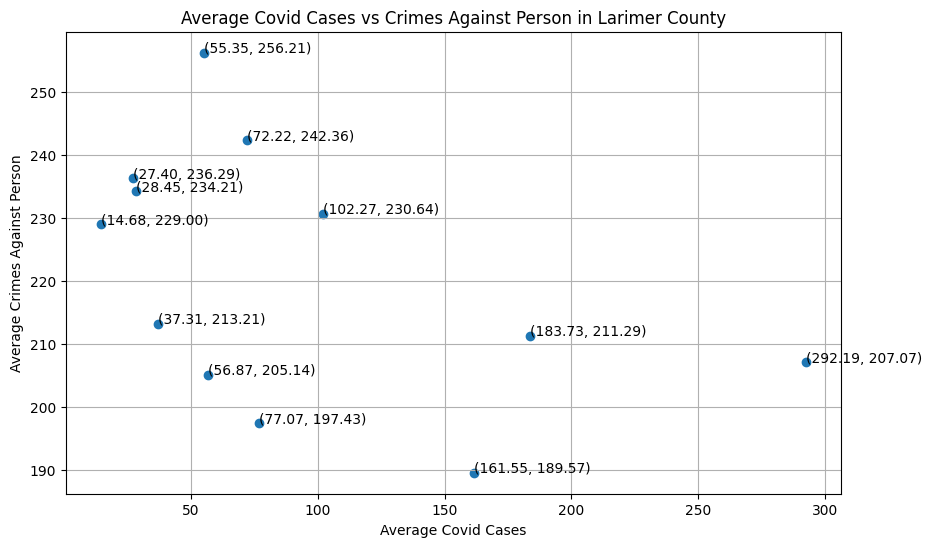

In [42]:
#average covid cases vs crimes against people in larimer county, a county of similar size to boulder
#filter the Dataframe for larimer county
larimer_df = crime_covid_join_df[crime_covid_join_df['County'] == 'Larimer']


#create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(larimer_df['Avg_Covid_Cases'], larimer_df['Avg_Crimes Against Person'])

#annotate each point with its coordinates rounded to two decimals
for index, row in larimer_df.iterrows():
    plt.text(row['Avg_Covid_Cases'], row["Avg_Crimes Against Person"], f'({row["Avg_Covid_Cases"]:.2f}, {row["Avg_Crimes Against Person"]:.2f})')

#Plot Details
plt.title("Average Covid Cases vs Crimes Against Person in Larimer County")
plt.xlabel("Average Covid Cases")
plt.ylabel("Average Crimes Against Person")
plt.grid(True)
plt.show()


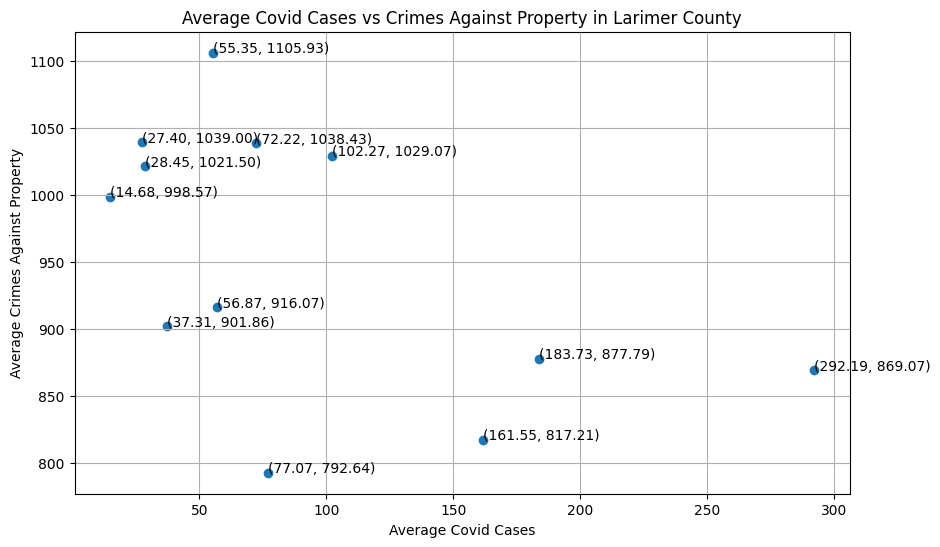

In [45]:
#average covid cases vs crimes against property in larimer county
#filter the Dataframe for larimer county
larimer_df = crime_covid_join_df[crime_covid_join_df['County'] == 'Larimer']

#create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(larimer_df['Avg_Covid_Cases'], larimer_df['Avg_Crimes Against Property'])

#annotate each point with its coordinates rounded to two decimals
for index, row in larimer_df.iterrows():
    plt.text(row["Avg_Covid_Cases"], row["Avg_Crimes Against Property"], f'({row["Avg_Covid_Cases"]:.2f}, {row["Avg_Crimes Against Property"]:.2f})')

plt.title('Average Covid Cases vs Crimes Against Property in Larimer County')
plt.xlabel('Average Covid Cases')
plt.ylabel('Average Crimes Against Property')
plt.grid(True)
plt.show()




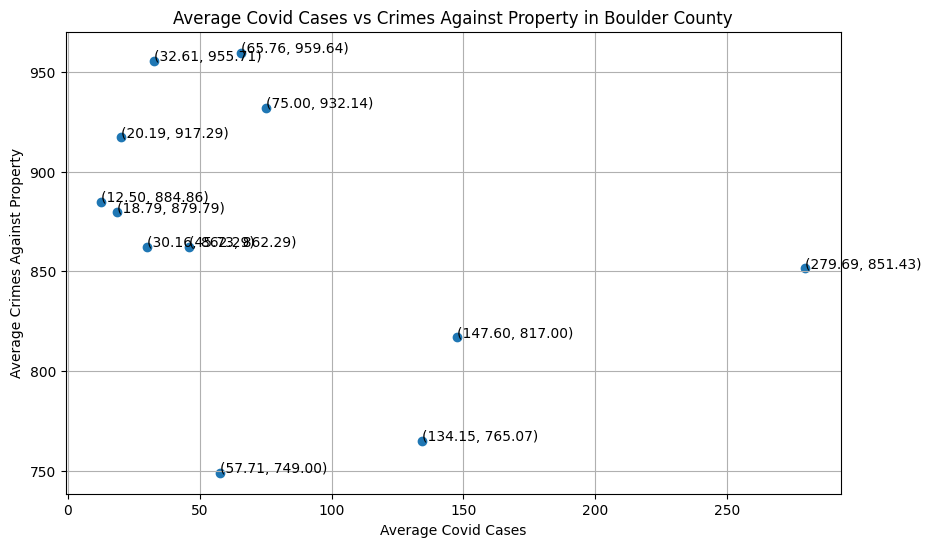

In [46]:
#average covid cases vs crimes against property in boulder county
#filter the dataframe for Boulder county
boulder_df = crime_covid_join_df[crime_covid_join_df['County'] == 'Boulder']

#create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(boulder_df['Avg_Covid_Cases'], boulder_df['Avg_Crimes Against Property'])

#annotate each point with its coordinates rounded to two decimals
for index, row in boulder_df.iterrows():
    plt.text(row["Avg_Covid_Cases"], row["Avg_Crimes Against Property"], f'({row["Avg_Covid_Cases"]:.2f}, {row["Avg_Crimes Against Property"]:.2f})')

plt.title('Average Covid Cases vs Crimes Against Property in Boulder County')
plt.xlabel('Average Covid Cases')
plt.ylabel('Average Crimes Against Property')
plt.grid(True)
plt.show()



In [47]:
#Sort boulder data by covid desc
#filter the dataframe for boulder county
boulder_sort_df = crime_covid_join_df[crime_covid_join_df['County'].isin(['Boulder'])]

#sort by Avg covid in descending order
boulder_sort_df = boulder_sort_df.sort_values(by='Avg_Covid_Cases', ascending=False)

#display the sorted DataFrame
boulder_sort_df


,County,Month,Avg_Covid_Cases,Avg_Covid_Deaths,Avg_Crimes Against Person,Avg_Crimes Against Property,Avg_Drug/Narcotic Violations
71,Boulder,1,279.687500,1.229167,187.357143,851.428571,83.214286
81,Boulder,11,147.600000,0.966667,180.142857,817.000000,70.142857
82,Boulder,12,134.145161,1.241935,176.285714,765.071429,63.642857
79,Boulder,9,75.000000,0.100000,225.071429,932.142857,99.000000
80,Boulder,10,65.758065,0.387097,223.142857,959.642857,99.642857
72,Boulder,2,57.714286,0.500000,182.428571,749.000000,84.928571
74,Boulder,4,45.733333,0.700000,196.642857,862.285714,86.214286
78,Boulder,8,32.612903,0.112903,212.928571,955.714286,76.857143
73,Boulder,3,30.161290,0.096774,203.857143,862.285714,82.071429
77,Boulder,7,20.193548,0.064516,228.928571,917.285714,61.142857


In [48]:
#Sort larimer data by covid desc
#filter the dataframe for "Larimer" county
larimer_sort_df = crime_covid_join_df[crime_covid_join_df['County'].isin(['Larimer'])]

#sort by Avg covid in descending order
larimer_sort_df = larimer_sort_df.sort_values(by='Avg_Covid_Cases', ascending=False)

#display the sorted DataFrame
larimer_sort_df

,County,Month,Avg_Covid_Cases,Avg_Covid_Deaths,Avg_Crimes Against Person,Avg_Crimes Against Property,Avg_Drug/Narcotic Violations
358,Larimer,1,292.187500,1.375000,207.071429,869.071429,97.214286
368,Larimer,11,183.733333,1.300000,211.285714,877.785714,96.214286
369,Larimer,12,161.548387,1.516129,189.571429,817.214286,85.785714
367,Larimer,10,102.274194,0.629032,230.642857,1029.071429,114.000000
359,Larimer,2,77.071429,1.071429,197.428571,792.642857,102.071429
366,Larimer,9,72.216667,0.483333,242.357143,1038.428571,114.785714
361,Larimer,4,56.866667,0.316667,205.142857,916.071429,100.642857
365,Larimer,8,55.354839,0.306452,256.214286,1105.928571,101.571429
360,Larimer,3,37.306452,0.177419,213.214286,901.857143,108.857143
362,Larimer,5,28.451613,0.274194,234.214286,1021.500000,105.428571


In [52]:
#find correlation coefficient between avg covid cases and crimes against people in boulder county

#filter the dataframe for Boulder county
boulder_df = crime_covid_join_df[crime_covid_join_df['County'] == 'Boulder']

#calculate the correlation coefficient
boulder_people_correlation = boulder_df['Avg_Covid_Cases'].corr(boulder_df['Avg_Crimes Against Person'])

#display the correlation coefficient
print('Correlation Coefficient between Avg_Covid_Cases and Avg_Crimes Against People in Boulder County:', boulder_people_correlation)


Correlation Coefficient between Avg_Covid_Cases and Avg_Crimes Against People in Boulder County: -0.4946557558522866


In [53]:
#find correlation coefficient between avg covid cases and crimes against People in larimer county

#filter the dataframe for Larimer county
larimer_df = crime_covid_join_df[crime_covid_join_df['County'] == 'Larimer']

#calculate the correlation coefficient
larimer_people_correlation = larimer_df['Avg_Covid_Cases'].corr(larimer_df['Avg_Crimes Against Person'])

#display the correlation coefficient
print('Correlation Coefficient between Avg_Covid_Cases and Avg_Crimes Against People in Larimer County:', larimer_people_correlation)

Correlation Coefficient between Avg_Covid_Cases and Avg_Crimes Against People in Larimer County: -0.47641258460542046


In [54]:
#find correlation coefficient between avg covid cases and crimes against property in boulder county

#filter the dataframe for Boulder county
boulder_df = crime_covid_join_df[crime_covid_join_df['County'] == 'Boulder']

#calculate the correlation coefficient
boulder_property_correlation = boulder_df['Avg_Covid_Cases'].corr(boulder_df['Avg_Crimes Against Property'])

#display the correlation coefficient
print('Correlation Coefficient between Avg_Covid_Cases and Avg_Crimes Against Property in Boulder County:', boulder_property_correlation)

Correlation Coefficient between Avg_Covid_Cases and Avg_Crimes Against Property in Boulder County: -0.3414473776847038


In [55]:
#find correlation coefficient between avg covid cases and crimes against property in larimer county

#filter the dataframe for Larimer county
larimer_df = crime_covid_join_df[crime_covid_join_df['County'] == 'Larimer']

#calculate the correlation coefficient
Larimer_property_correlation = larimer_df['Avg_Covid_Cases'].corr(larimer_df['Avg_Crimes Against Property'])

#display the correlation coefficient
print('Correlation Coefficient between Avg_Covid_Cases and Avg_Crimes Against Property in Larimer County:', Larimer_property_correlation)

Correlation Coefficient between Avg_Covid_Cases and Avg_Crimes Against Property in Larimer County: -0.513806784189978
